In [9]:
# Import required libraries# Import required libraries
import pandas as pd #pandas is used for data manipulation and analysis
import numpy as np # numpy is used for numerical operations
# Define column names (optional, useful if the dataset has no header)
#col_names = ['PassengerId','Polass','Name', "Sex', "Age', Ticket',Fare "Survived'1
# Specify the CSV file name (local filename)
csvfile = "titanic(1).csv"
# Specifythe full file path to the SV file (used for loading the dataset)
csvfilePath = '/content/titanic (1).csv'
# Load the Titanic dataset into a pandas DataFrame
#'pd. read_csv() ' reads the CV file and stores it in a structured table format
data = pd. read_csv(csvfilePath)
# Display the firstrows of the dataset to verify successful loading
data.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0


Data Preprocessing

In [14]:
import pandas as pd
from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Drop rows with missing values
data = data. dropna()

#Autometically select numeric columns
numeric_columns = data.select_dtypes (include=['int64', 'float64']). columns


#if the dataset has at least 2 numeric columns
if len (numeric_columns) <2:
  raise ValueError("Dataset must have at least two numeric columns for features and target.")

#Use all numeric columns except the last as features and last as target
X= data[numeric_columns[:-1]]
y = data[numeric_columns [-1]]

#split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train K-Nearest Neighbors(KNN) Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

#Make Prediction
knn_pred=knn.predict(X_test_scaled)

#Evaluate Accuracy
knn_acc=accuracy_score(y_test,knn_pred)
print("KNN Accuracy:", round(knn_acc, 6))


KNN Accuracy: 0.681564


Train Logistic Refression Classifier

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#initialize and train Logistic Regression Model
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

#Make Prediction
log_pred=log_reg.predict(X_test_scaled)

#Evaluate accuracy
log_acc=accuracy_score(y_test,log_pred)
print("Logistic Regression Accuracy:",round(log_acc,6))





Logistic Regression Accuracy: 0.692737


Compare both Models

In [21]:
print("\nModel Performsnce Comparison:")
print(f"KNN Accuracy:{knn_acc:.6f}")
print(f"Logistic Regression Accuracy:{log_acc:.6}")



Model Performsnce Comparison:
KNN Accuracy:0.681564
Logistic Regression Accuracy:0.692737


Generate Detailed Reports

In [29]:
from sklearn.metrics import classification_report

print('Classification Report (Logistic Regression):')
print(classification_report(y_test, log_pred))

print("\nClassification Report (KNN):")
print (classification_report(y_test, knn_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       107
           1       0.67      0.46      0.55        72

    accuracy                           0.69       179
   macro avg       0.69      0.65      0.66       179
weighted avg       0.69      0.69      0.68       179


Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       107
           1       0.63      0.50      0.56        72

    accuracy                           0.68       179
   macro avg       0.67      0.65      0.65       179
weighted avg       0.68      0.68      0.67       179



Confusion Martrix Visualization

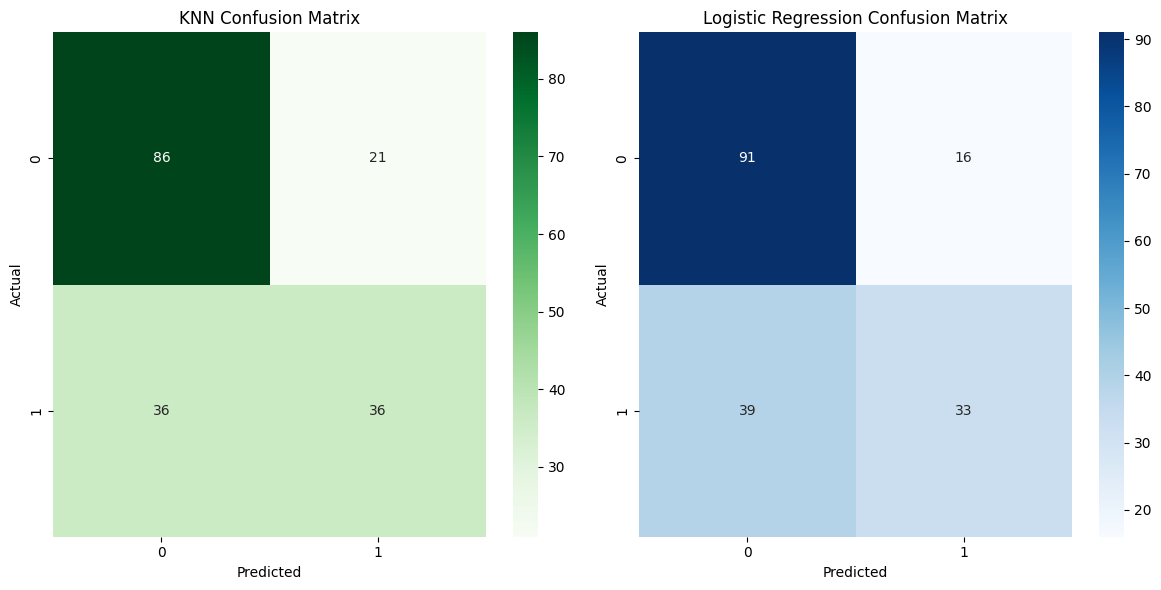

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Create Confusion Matrices
cm_knn=confusion_matrix(y_test,knn_pred)
cm_log=confusion_matrix(y_test,log_pred)

#plot side by side confusion matrices
fig,axes=plt.subplots(1,2,figsize=(12,6))

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Accuracy Comparison Bar Chart


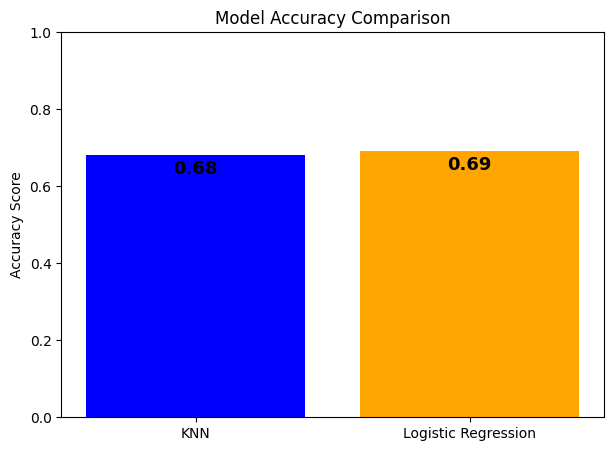

In [41]:
import matplotlib.pyplot as plt

#Accuracy data
models=['KNN', 'Logistic Regression']
accuracies = [knn_acc, log_acc]

#Create bar chart
plt.figure(figsize=(7,5))
bars=plt.bar(models, accuracies, color=["blue","orange"])
plt.title('Model Accuracy Comparison')
plt.ylabel("Accuracy Score")
plt.ylim(0,1)


#Add accuracy labels on top of bars
for bar in bars:
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height() -0.05,f"{bar.get_height():.2f}",
           ha="center",color="black", fontsize=13, fontweight="bold")
plt.show()